<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-a00351269/blob/main/Actividad_Semanal--7_Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold


# to make this notebook's output stable across runs
np.random.seed(42)



#Ejercicio 1. Costo en la industria de manufactura. 
##Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.


###1.- Divide los datos del costo de manufactura. 

###Utiliza la función train_test_split (viene el ejemplo al final del notebook)

2.- Regresion Lineal.

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.


3.- Regresión Polinomial.

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.


4.- Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.


5.- Finalmente grafica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)

6.- Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?





In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')# leemos a un dataframe la informacion
df.sample(10)

,Number of Units,Manufacturing Cost
434,4.235860,41.403990
47,2.218826,61.093235
97,2.763321,63.478275
397,4.126858,50.108522
575,4.688092,48.512880
739,5.289438,37.255202
828,5.641296,26.648139
706,5.193377,35.236973
316,3.865207,41.125125
72,2.575527,53.388272


In [ ]:
df.describe()#la informacion estadistica resumida de cada columna

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [ ]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

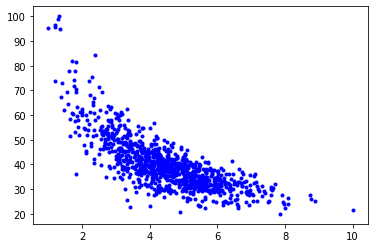

In [ ]:
plt.plot(X,y,'b.')#vemos el grafico de los datos X,y

1.- Realizamos la particion :

In [ ]:
Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size=0.20,random_state=0)


In [ ]:
print(Xtv.shape, Xtest.shape, ytv.shape, ytest.shape)

(800, 1) (200, 1) (800,) (200,)


###2.- Regresion Lineal.

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [ ]:
modelo = LinearRegression(fit_intercept=True)
modelo.fit(Xtv, ytv)

LinearRegression()

Estos son los coeficientes y el intercept:

In [ ]:
print("Model slope:    ", modelo.coef_[0])
print("Model intercept:", modelo.intercept_)

Model slope:     -6.123962526222854
Model intercept: 67.51699929483895



La ecuacion del modelo queda asi:


$\hat{y} =  -6.124X +67.517$

Así veamos la visualizacion:

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


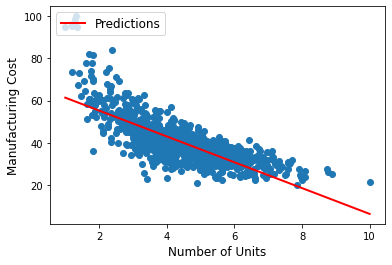

In [ ]:
X_fit = np.linspace(1, 10, 100)
y_fit = modelo.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel('Number of Units', fontsize=12)
plt.ylabel('Manufacturing Cost', fontsize=12)
plt.legend(loc="upper left", fontsize=12);

Ahora obtenemos la siguientes metricas:

In [ ]:
y_pred=modelo.predict(Xtest)

In [ ]:
resultados={}
resultados['LR lineal']=[mean_absolute_error(ytest, y_pred),mean_squared_error(ytest, y_pred, squared=False), r2_score(ytest, y_pred)]

In [ ]:
print('   Error Medio Absoluto (MAE):', resultados['LR lineal'][0])
print('Root Mean Squared Error(RMSE):', resultados['LR lineal'][1])
print('                     r2_score:',resultados ['LR lineal'][2])

   Error Medio Absoluto (MAE): 4.8901661963170975
Root Mean Squared Error(RMSE): 7.023460530219433
                     r2_score: 0.5526895076238993


##3.- Regresión Polinomial.

Realiza la regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(Xtv)

In [ ]:
modelo.fit(X_poly, ytv)


LinearRegression()

In [ ]:
print("Model coefs: ", modelo.coef_)
print("Model intercept:", modelo.intercept_)

Model coefs:  [-17.35377809   1.24345115]
Model intercept: 90.69281709517362



La ecuacion queda:

$\hat{y} =  -17.35X +1.24X^2 + 90.69$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


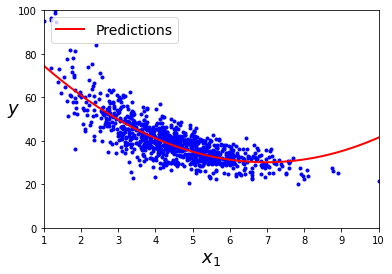

In [ ]:
X_new=np.linspace(1, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = modelo.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([1, 10, 0, 100]);

In [ ]:
X_polytest = poly_features.fit_transform(Xtest)
y_pred=modelo.predict(X_polytest)


In [ ]:
resultados['LR polinomial']=[mean_absolute_error(ytest, y_pred),mean_squared_error(ytest, y_pred, squared=False), r2_score(ytest, y_pred)]

In [ ]:
print('   Error Medio Absoluto (MAE):', resultados['LR polinomial'][0])
print('Root Mean Squared Error(RMSE):', resultados['LR polinomial'][1])
print('                     r2_score:',resultados ['LR polinomial'][2])

   Error Medio Absoluto (MAE): 4.499477736770161
Root Mean Squared Error(RMSE): 6.14594886001069
                     r2_score: 0.657480992082238


##4.- Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.



In [ ]:
modelo = Ridge(alpha=1)
modelo.fit(Xtv, ytv)

Ridge(alpha=1)

In [ ]:
print("Model coefs: ", modelo.coef_)
print("Model intercept:", modelo.intercept_)

Model coefs:  [-6.1195816]
Model intercept: 67.49755921641744



La ecuacion del modelo queda asi:


$\hat{y} =  -6.119X +67.497$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


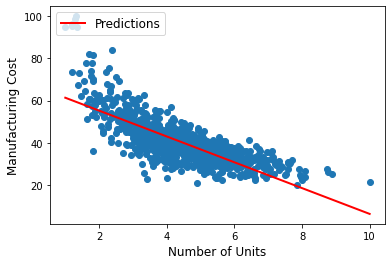

In [ ]:
X_fit = np.linspace(1, 10, 100)
y_fit = modelo.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel('Number of Units', fontsize=12)
plt.ylabel('Manufacturing Cost', fontsize=12)
plt.legend(loc="upper left", fontsize=12);

In [ ]:
y_pred=modelo.predict(Xtest)

In [ ]:
resultados['Ridge Lineal']=[mean_absolute_error(ytest, y_pred),mean_squared_error(ytest, y_pred, squared=False), r2_score(ytest, y_pred)]

In [ ]:
print('   Error Medio Absoluto (MAE):', resultados['Ridge Lineal'][0])
print('Root Mean Squared Error(RMSE):', resultados['Ridge Lineal'][1])
print('                     r2_score:',resultados ['Ridge Lineal'][2])

   Error Medio Absoluto (MAE): 4.888986436763052
Root Mean Squared Error(RMSE): 7.022967198991941
                     r2_score: 0.5527523440229261


Ahora con Ridge polinomio grado 2:

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(Xtv)

In [ ]:
modelo = Ridge(alpha=10)
modelo.fit(X_poly, ytv)


Ridge(alpha=10)

In [ ]:
print("Model coefs: ", modelo.coef_)
print("Model intercept:", modelo.intercept_)

Model coefs:  [-14.688572     0.95998252]
Model intercept: 84.9428312958091



La ecuacion queda:

$\hat{y} =  -14.688X +0.959X^2 + 84.942$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


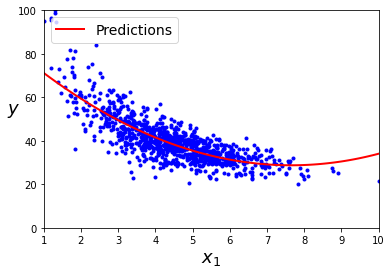

In [ ]:
X_new=np.linspace(1, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = modelo.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([1, 10, 0, 100]);

In [ ]:
X_polytest = poly_features.fit_transform(Xtest)
y_pred=modelo.predict(X_polytest)


In [ ]:
resultados['Ridge polinomial']=[mean_absolute_error(ytest, y_pred),mean_squared_error(ytest, y_pred, squared=False), r2_score(ytest, y_pred)]

In [ ]:
print('   Error Medio Absoluto (MAE):', resultados['Ridge polinomial'][0])
print('Root Mean Squared Error(RMSE):', resultados['Ridge polinomial'][1])
print('                     r2_score:',resultados ['Ridge polinomial'][2])

   Error Medio Absoluto (MAE): 4.409342255329253
Root Mean Squared Error(RMSE): 6.113000427338259
                     r2_score: 0.661143636871347


Ahora con Lasso:


In [ ]:
modelo = Lasso(alpha=0.01)
modelo.fit(Xtv, ytv)



Lasso(alpha=0.01)

In [ ]:
print("Model coefs: ", modelo.coef_)
print("Model intercept:", modelo.intercept_)

Model coefs:  [-6.11823544]
Model intercept: 67.49158569020855


La ecuacion del modelo queda asi:


$\hat{y} =  -6.118X +67.491$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


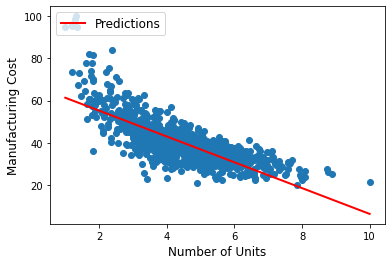

In [ ]:
X_fit = np.linspace(1, 10, 100)
y_fit = modelo.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel('Number of Units', fontsize=12)
plt.ylabel('Manufacturing Cost', fontsize=12)
plt.legend(loc="upper left", fontsize=12);

In [ ]:
y_pred=modelo.predict(Xtest)

In [ ]:
resultados['Lasso Lineal']=[mean_absolute_error(ytest, y_pred),mean_squared_error(ytest, y_pred, squared=False), r2_score(ytest, y_pred)]

In [ ]:
print('   Error Medio Absoluto (MAE):', resultados['Lasso Lineal'][0])
print('Root Mean Squared Error(RMSE):', resultados['Lasso Lineal'][1])
print('                     r2_score:',resultados ['Lasso Lineal'][2])

   Error Medio Absoluto (MAE): 4.88862392152708
Root Mean Squared Error(RMSE): 7.022816666977871
                     r2_score: 0.552771516650963


In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(Xtv)

In [ ]:
modelo = Lasso(alpha=0.01)
modelo.fit(X_poly, ytv)


Lasso(alpha=0.01)

In [ ]:
print("Model coefs: ", modelo.coef_)
print("Model intercept:", modelo.intercept_)

Model coefs:  [-17.19081995   1.22605661]
Model intercept: 90.34258632198699



La ecuacion queda:

$\hat{y} =  -17.19X +1.226X^2 + 90.342$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


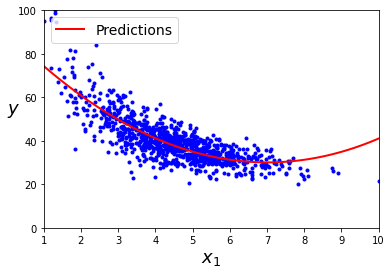

In [ ]:
X_new=np.linspace(1, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = modelo.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([1, 10, 0, 100]);

In [ ]:
X_polytest = poly_features.fit_transform(Xtest)
y_pred=modelo.predict(X_polytest)


In [ ]:
resultados['Lasso polinomial']=[mean_absolute_error(ytest, y_pred),mean_squared_error(ytest, y_pred, squared=False), r2_score(ytest, y_pred)]

In [ ]:
print('   Error Medio Absoluto (MAE):', resultados['Lasso polinomial'][0])
print('Root Mean Squared Error(RMSE):', resultados['Lasso polinomial'][1])
print('                     r2_score:',resultados ['Lasso polinomial'][2])

   Error Medio Absoluto (MAE): 4.491243025976135
Root Mean Squared Error(RMSE): 6.139727695363716
                     r2_score: 0.6581740628248847


In [ ]:
resultados

{'LR lineal': [4.8901661963170975, 7.023460530219433, 0.5526895076238993],
 'LR polinomial': [4.499477736770161, 6.14594886001069, 0.657480992082238],
 'Ridge Lineal': [4.888986436763052, 7.022967198991941, 0.5527523440229261],
 'Ridge polinomial': [4.409342255329253, 6.113000427338259, 0.661143636871347],
 'Lasso Lineal': [4.88862392152708, 7.022816666977871, 0.552771516650963],
 'Lasso polinomial': [4.491243025976135,
  6.139727695363716,
  0.6581740628248847]}

In [ ]:
modelos=resultados.keys()
modelos

dict_keys(['LR lineal', 'LR polinomial', 'Ridge Lineal', 'Ridge polinomial', 'Lasso Lineal', 'Lasso polinomial'])

##5.- Finalmente grafica : MAE (de los cuatro métodos) R2 (de los cuatro métodos)


MAE de  LR lineal   4.8901661963170975
MAE de  LR polinomial   4.499477736770161
MAE de  Ridge Lineal   4.888986436763052
MAE de  Ridge polinomial   4.409342255329253
MAE de  Lasso Lineal   4.88862392152708
MAE de  Lasso polinomial   4.491243025976135


Text(0.5, 1.0, 'MAE')

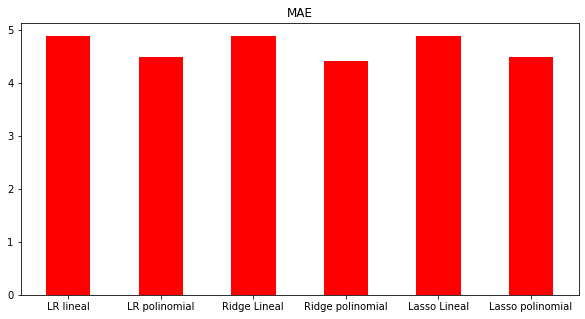

In [ ]:
# Grafica de MAE
mae_value = list()
for modelo in modelos:
  mae_value.append(resultados[modelo][0])
  print('MAE de ',modelo," ",resultados[modelo][0])

plt.figure(figsize = (10, 5))
plt.bar(modelos, mae_value, color ='red', width = 0.48)
plt.title("MAE")



RMSE de  LR lineal   7.023460530219433
RMSE de  LR polinomial   6.14594886001069
RMSE de  Ridge Lineal   7.022967198991941
RMSE de  Ridge polinomial   6.113000427338259
RMSE de  Lasso Lineal   7.022816666977871
RMSE de  Lasso polinomial   6.139727695363716


Text(0.5, 1.0, 'RMSE')

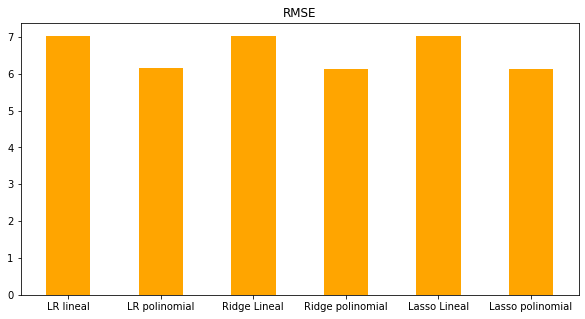

In [ ]:
rmse_value = list()
for modelo in modelos:
  rmse_value.append(resultados[modelo][1])
  print('RMSE de ',modelo," ",resultados[modelo][1])

plt.figure(figsize = (10, 5))
plt.bar(modelos, rmse_value, color ='orange', width = 0.48)
plt.title("RMSE")

r2_sccore de  LR lineal   0.5526895076238993
r2_sccore de  LR polinomial   0.657480992082238
r2_sccore de  Ridge Lineal   0.5527523440229261
r2_sccore de  Ridge polinomial   0.661143636871347
r2_sccore de  Lasso Lineal   0.552771516650963
r2_sccore de  Lasso polinomial   0.6581740628248847


Text(0.5, 1.0, 'r2_score')

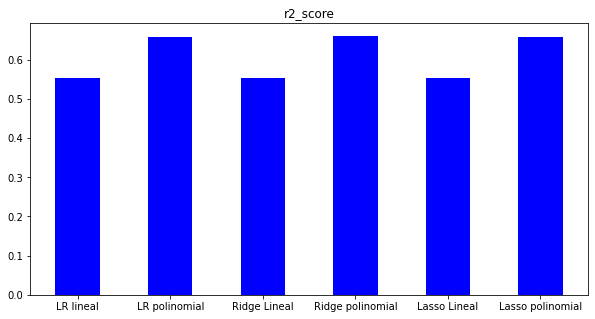

In [ ]:
r2_value = list()
for modelo in modelos:
  r2_value.append(resultados[modelo][2])
  print('r2_sccore de ',modelo," ",resultados[modelo][2])

plt.figure(figsize = (10, 5))
plt.bar(modelos, r2_value, color ='blue', width = 0.48)
plt.title("r2_score")


##6.- Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

Dependiendo de la cantidad de datos disponibles se hacen las particiones entre un 10 a un 25%.

En este caso, utilizamos un 20% para test y un 80% para entrenamiento de los modelos en cada caso.

AL aplicar los distintos modelos de regresion , lo que nos dió los menores errores MAE y RMSE fueron en los polinomiales, y su  r2 estuvo un poco mayor en cada caso con respecto a los lineales, lo cual nos indica una mejor relacion con la data modelada. Entre mas cerca de 1 es r2 esto es mejor.


Le sugerimos a la empresa utilizar  cualquiera de los metodos con polinomial de polinomial de grado 2, y una forma mas simple de modelo, el Linear Regresion() polinomial de grado 2.


Nota: cuando se aumentaba el grado del polinomonio vimos que los errores crecian, por ello nos quedamos con un polinomia grado 2.




#Ejercicio 2
###Encuentra el mejor regresor para los datos de las casas:

###2.1. Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).

###2.2. Regresión Múltiple Lineal.
###Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.

###2.3. Regresión Múltiple Polinomial.
###Realiza la  regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

###2.4. Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.

###2.5. Finalmente grafica :
### MAE (de los cuatro métodos)
### R2 (de los cuatro métodos)

###2.6. 
###Explica tus resultados, que método se aproxima mejor, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste? ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?
###Agrega las conclusiones

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20016,7853420100,20140623T000000,633634.0,4,3.50,2960,6000,2.0,0,0,...,9,2960,0,2014,0,98065,47.5183,-121.886,2960,6000
6117,321049127,20141028T000000,277500.0,3,2.25,1820,19602,1.0,0,0,...,7,1820,0,1964,0,98001,47.3310,-122.286,1520,8773
5996,3224079005,20141009T000000,255000.0,2,1.00,920,43560,1.0,0,0,...,5,920,0,1923,0,98024,47.5245,-121.931,1530,11875
6976,8079000190,20141028T000000,415000.0,4,2.50,2150,8173,2.0,0,0,...,8,2150,0,1987,0,98059,47.5110,-122.153,2080,7620
4312,4331000265,20140926T000000,167000.0,3,2.00,1520,7456,1.0,0,0,...,7,1520,0,1949,0,98166,47.4745,-122.343,1740,8464
13664,6388920410,20150423T000000,655000.0,3,2.50,2370,7916,2.0,0,0,...,9,2370,0,1990,0,98056,47.5280,-122.171,2500,8221
11312,3235100075,20150503T000000,279000.0,3,1.00,1010,7903,1.0,0,0,...,6,1010,0,1948,0,98155,47.7660,-122.320,1010,7903
14534,3905090410,20150123T000000,760000.0,4,2.50,3120,8792,2.0,0,0,...,9,3120,0,1992,0,98029,47.5699,-121.993,2150,7688
18267,2558160220,20141210T000000,385000.0,4,2.50,2030,11375,1.0,0,0,...,7,1330,700,1969,0,98028,47.7765,-122.261,1500,9160
17912,9158100040,20140808T000000,401000.0,2,1.00,1400,8220,1.0,0,0,...,7,1400,0,1949,0,98133,47.7228,-122.357,1760,8220


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


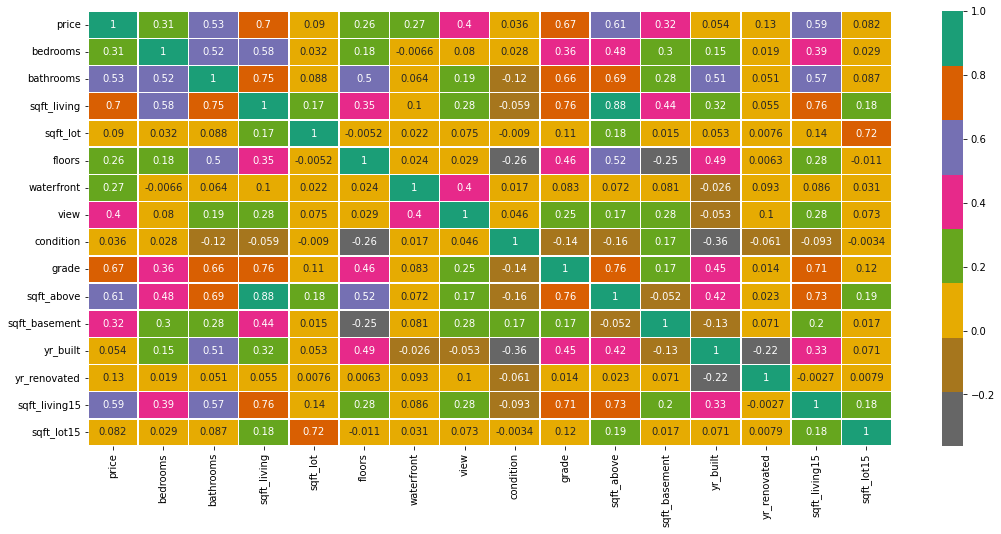

In [ ]:
plt.figure(figsize=(18,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 0.5)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

###2.1. Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)



###2.2. Regresión Múltiple Lineal.
Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.

In [ ]:
modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Model coefs: ", modelo.coef_)
print("Model intercept:", modelo.intercept_)

Model coefs:  [[-3.82008048e+04  4.14661380e+04  1.07992584e+02  1.71356997e-02
   3.16916913e+04  5.52691023e+05  4.12493228e+04  2.12221443e+04
   1.19493216e+05  4.77750271e+01  6.02175565e+01 -3.55090216e+03
   1.32602215e+01  2.90059284e+01 -5.48132603e-01]]
Model intercept: [6151359.2627409]


In [ ]:
y_pred=modelo.predict(X_test)

In [ ]:
resultados={}
resultados['LR lineal']=[mean_absolute_error(y_test, y_pred),mean_squared_error(y_test, y_pred, squared=False), r2_score(y_test, y_pred)]

In [ ]:
print('   Error Medio Absoluto (MAE):', resultados['LR lineal'][0])
print('Root Mean Squared Error(RMSE):', resultados['LR lineal'][1])
print('                     r2_score:',resultados ['LR lineal'][2])

   Error Medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error(RMSE): 232133.3676240749
                     r2_score: 0.6579723205007814



###2.3. Regresión Múltiple Polinomial.

###Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [ ]:
modelo.fit(X_poly, y_train)

LinearRegression()

In [ ]:
print("Model coefs: ", modelo.coef_)
print("Model intercept:", modelo.intercept_)

Model coefs:  [[ 9.33912834e+05 -1.09330730e+06 -4.56449932e+02 -2.78686288e+01
  -2.07407238e+06 -3.95431870e+06 -2.88638026e+05  5.58697570e+05
   1.09864510e+06 -2.19758415e+02 -3.82034272e+02 -8.59630908e+04
  -2.95351595e+03  3.99965710e+03 -3.40106316e+01  9.57541696e+02
   7.49958190e+03 -1.37969466e+01 -1.84926695e-02  8.57699569e+03
  -1.14965893e+04 -3.06588900e+02 -5.24628836e+03 -5.36788065e+03
  -1.20757669e+00 -1.46068182e+01 -4.67099451e+02 -9.13191519e+00
   1.72800642e+01  2.15500198e-01 -9.63429892e+03  1.53879172e+01
  -1.35842369e-01 -2.59067293e+04  4.33707238e+04  3.82942459e+03
  -1.07592927e+03  2.22971689e+04  1.44292325e+01  1.33928361e+00
   5.03401980e+02 -1.70798805e+01 -1.72895923e+01 -5.56785248e-02
   1.56185890e+00 -4.34972758e+00  4.83299456e+00  1.60303193e+02
  -1.42711737e+01  1.31138593e+01  2.07283397e+01  2.61335089e+00
  -4.41381412e+00 -2.20765903e+00  6.36282684e-02  3.53629072e+00
   1.88176819e+01  3.06637958e-07  4.40839907e-01 -9.84216136e

In [ ]:
X_polytest = poly_features.fit_transform(X_test)
y_pred=modelo.predict(X_polytest)


In [ ]:
resultados['LR polinomial']=[mean_absolute_error(y_test, y_pred),mean_squared_error(y_test, y_pred, squared=False), r2_score(y_test, y_pred)]

In [ ]:
print('   Error Medio Absoluto (MAE):', resultados['LR polinomial'][0])
print('Root Mean Squared Error(RMSE):', resultados['LR polinomial'][1])
print('                     r2_score:',resultados ['LR polinomial'][2])

   Error Medio Absoluto (MAE): 121314.06948173394
Root Mean Squared Error(RMSE): 186261.28575138954
                     r2_score: 0.7797929072570198



###2.4. Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.

Ridge

In [ ]:
modelo = Ridge(alpha=1)
modelo.fit(X_train, y_train)

Ridge(alpha=1)

In [ ]:
print("Model coefs: ", modelo.coef_)
print("Model intercept:", modelo.intercept_)

Model coefs:  [[-3.82192265e+04  4.14509656e+04  1.08013951e+02  1.69318239e-02
   3.16891574e+04  5.48258333e+05  4.14559235e+04  2.12264347e+04
   1.19470568e+05  4.78066878e+01  6.02065605e+01 -3.55050129e+03
   1.33171890e+01  2.89851987e+01 -5.47998512e-01]]
Model intercept: [6150751.3836867]


In [ ]:
y_pred=modelo.predict(X_test)

In [ ]:
resultados['Ridge lineal']=[mean_absolute_error(y_test, y_pred),mean_squared_error(y_test, y_pred, squared=False), r2_score(y_test, y_pred)]

In [ ]:
print('   Error Medio Absoluto (MAE):', resultados['Ridge lineal'][0])
print('Root Mean Squared Error(RMSE):', resultados['Ridge lineal'][1])
print('                     r2_score:',resultados ['Ridge lineal'][2])

   Error Medio Absoluto (MAE): 137491.0433940327
Root Mean Squared Error(RMSE): 232165.2426647754
                     r2_score: 0.6578783840295006


Ridge Polinomial

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [ ]:
modelo.fit(X_poly, y_train)

Ridge(alpha=1)

In [ ]:
print("Model coefs: ", modelo.coef_)
print("Model intercept:", modelo.intercept_)

Model coefs:  [[ 4.60229790e+05 -2.83585413e+05 -4.55464410e+02 -2.82448011e+01
  -3.80402269e+05 -1.05185321e+05 -3.14232811e+05  2.78096459e+05
   4.58289840e+05 -4.76026296e+02 -1.00096362e+02 -9.44134661e+04
  -3.20983501e+03  4.23087633e+03 -3.23674215e+01  9.32986146e+02
   3.48742438e+03  5.43975087e+01 -2.14546577e-02  4.70502058e+03
  -2.56476409e+04  3.24879982e+02 -3.01444787e+03 -5.66059875e+03
  -6.66169999e+01 -8.02106332e+01 -2.22983571e+02 -4.78159577e+00
   1.54263885e+01  1.97165496e-01 -5.25211822e+03 -2.52928970e+01
  -1.30155764e-01 -1.47629184e+04  6.45325301e+04  2.42711649e+03
  -7.85325849e+03  1.77292578e+04  5.37640732e+01  4.16252730e+01
   1.06288743e+02 -2.44400242e+01 -1.18911213e+01 -2.73755715e-02
   7.88204211e+01  5.87436298e+01 -1.42333083e+01  7.07228388e+01
  -2.62685556e+00 -5.83766594e+00  6.93510243e+00 -1.88075328e+01
  -1.07351638e+01 -4.35856686e+01  1.09136165e+02  2.79321857e+01
   5.12600511e+01  3.21238544e-07  4.52082841e-01 -1.20510056e

In [ ]:
X_polytest = poly_features.fit_transform(X_test)
y_pred=modelo.predict(X_polytest)


In [ ]:
resultados['Ridge polinomial']=[mean_absolute_error(y_test, y_pred),mean_squared_error(y_test, y_pred, squared=False), r2_score(y_test, y_pred)]

In [ ]:
print('   Error Medio Absoluto (MAE):', resultados['Ridge polinomial'][0])
print('Root Mean Squared Error(RMSE):', resultados['Ridge polinomial'][1])
print('                     r2_score:',resultados ['Ridge polinomial'][2])

   Error Medio Absoluto (MAE): 121404.76295997466
Root Mean Squared Error(RMSE): 186174.41030556874
                     r2_score: 0.7799982760523756


Ahora con Lasso:

In [ ]:
modelo = Lasso(alpha=0.01, max_iter=8000)
modelo.fit(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.01, max_iter=8000)

In [ ]:
print("Model coefs: ", modelo.coef_)
print("Model intercept:", modelo.intercept_)

Model coefs:  [-3.82007921e+04  4.14660952e+04  2.93481980e+02  1.71356245e-02
  3.16916458e+04  5.52689524e+05  4.12493792e+04  2.12221167e+04
  1.19493202e+05 -1.37714322e+02 -1.25271820e+02 -3.55090164e+03
  1.32602477e+01  2.90059224e+01 -5.48132637e-01]
Model intercept: [6151358.47125267]


In [ ]:
y_pred=modelo.predict(X_test)

In [ ]:
resultados['Lasso lineal']=[mean_absolute_error(y_test, y_pred),mean_squared_error(y_test, y_pred, squared=False), r2_score(y_test, y_pred)]

In [ ]:
print('   Error Medio Absoluto (MAE):', resultados['Lasso lineal'][0])
print('Root Mean Squared Error(RMSE):', resultados['Lasso lineal'][1])
print('                     r2_score:',resultados ['Lasso lineal'][2])

   Error Medio Absoluto (MAE): 137480.14315454173
Root Mean Squared Error(RMSE): 232133.3792204408
                     r2_score: 0.657972286328372


Lasso Polinomial:


In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [ ]:
modelo.fit(X_poly, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.308e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.01, max_iter=8000)

In [ ]:
print("Model coefs: ", modelo.coef_)
print("Model intercept:", modelo.intercept_)

Model coefs:  [ 6.16471883e+05 -1.00341220e+05  3.64456049e+02 -1.40465061e+01
 -4.06358378e+05 -2.17617745e+06  2.71151449e+05  6.80622524e+05
  5.49319867e+05 -3.53585772e+02 -3.54078550e+02 -1.22092104e+04
 -9.97022723e+02  8.76592222e+02 -1.08194328e+01  1.06918486e+03
  3.46406910e+03 -2.56717202e+01 -1.18760573e-01  8.56598185e+03
 -2.07802079e+04 -5.60810930e+02 -3.30539900e+03 -5.92014103e+03
  1.23172258e+01  1.03123484e+00 -3.08995075e+02 -4.39070636e+00
  1.99326172e+01  2.47773128e-01 -3.95767181e+03  6.01872106e+01
 -1.04001641e-01 -2.16041249e+04  4.72160313e+04  6.05878868e+03
 -1.26867392e+04  2.21143949e+04 -2.74670119e+01 -4.70052497e+01
  2.45435145e+01 -2.59944123e+01 -3.18930326e+01  1.23185405e-01
 -2.02717308e-02  7.54138847e-04 -6.68871018e+00 -2.92152902e+02
  8.23264538e+01 -2.58714483e+01  2.88898567e+01 -6.56181332e-02
 -6.05434947e-02 -6.24758101e-02  5.20834660e-02 -5.61512042e-03
  1.63334647e-03  1.51942000e-07  4.44045795e-01 -1.82003402e-01
 -9.8203962

In [ ]:
X_polytest = poly_features.fit_transform(X_test)
y_pred=modelo.predict(X_polytest)


In [ ]:
resultados['Lasso polinomial']=[mean_absolute_error(y_test, y_pred),mean_squared_error(y_test, y_pred, squared=False), r2_score(y_test, y_pred)]

In [ ]:
print('   Error Medio Absoluto (MAE):', resultados['Lasso polinomial'][0])
print('Root Mean Squared Error(RMSE):', resultados['Lasso polinomial'][1])
print('                     r2_score:',resultados ['Lasso polinomial'][2])

   Error Medio Absoluto (MAE): 121523.32193129537
Root Mean Squared Error(RMSE): 186989.3883023174
                     r2_score: 0.7780679463245579


In [ ]:
resultados

{'LR lineal': [137480.1388273178, 232133.3676240749, 0.6579723205007814],
 'LR polinomial': [121314.06948173394, 186261.28575138954, 0.7797929072570198],
 'Ridge lineal': [137491.0433940327, 232165.2426647754, 0.6578783840295006],
 'Ridge polinomial': [121404.76295997466,
  186174.41030556874,
  0.7799982760523756],
 'Lasso lineal': [137480.14315454173, 232133.3792204408, 0.657972286328372],
 'Lasso polinomial': [121523.32193129537,
  186989.3883023174,
  0.7780679463245579]}

In [ ]:
modelos=resultados.keys()
modelos

dict_keys(['LR lineal', 'LR polinomial', 'Ridge lineal', 'Ridge polinomial', 'Lasso lineal', 'Lasso polinomial'])


###2.5. Finalmente grafica : MAE (de los cuatro métodos) , R2 (de los cuatro métodos)

MAE de  LR lineal   137480.1388273178
MAE de  LR polinomial   121314.06948173394
MAE de  Ridge lineal   137491.0433940327
MAE de  Ridge polinomial   121404.76295997466
MAE de  Lasso lineal   137480.14315454173
MAE de  Lasso polinomial   121523.32193129537


Text(0.5, 1.0, 'MAE')

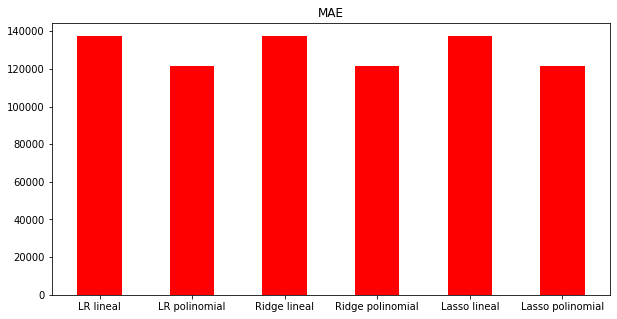

In [ ]:
# Grafica de MAE
mae_value = list()
for modelo in modelos:
  mae_value.append(resultados[modelo][0])
  print('MAE de ',modelo," ",resultados[modelo][0])

plt.figure(figsize = (10, 5))
plt.bar(modelos, mae_value, color ='red', width = 0.48)
plt.title("MAE")


RMSE de  LR lineal   232133.3676240749
RMSE de  LR polinomial   186261.28575138954
RMSE de  Ridge lineal   232165.2426647754
RMSE de  Ridge polinomial   186174.41030556874
RMSE de  Lasso lineal   232133.3792204408
RMSE de  Lasso polinomial   186989.3883023174


Text(0.5, 1.0, 'RMSE')

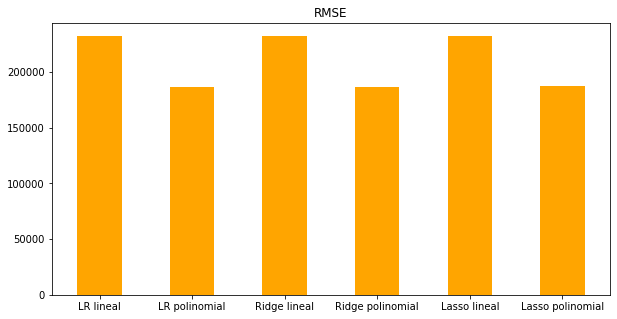

In [ ]:
rmse_value = list()
for modelo in modelos:
  rmse_value.append(resultados[modelo][1])
  print('RMSE de ',modelo," ",resultados[modelo][1])

plt.figure(figsize = (10, 5))
plt.bar(modelos, rmse_value, color ='orange', width = 0.48)
plt.title("RMSE")

r2_sccore de  LR lineal   0.6579723205007814
r2_sccore de  LR polinomial   0.7797929072570198
r2_sccore de  Ridge lineal   0.6578783840295006
r2_sccore de  Ridge polinomial   0.7799982760523756
r2_sccore de  Lasso lineal   0.657972286328372
r2_sccore de  Lasso polinomial   0.7780679463245579


Text(0.5, 1.0, 'r2_score')

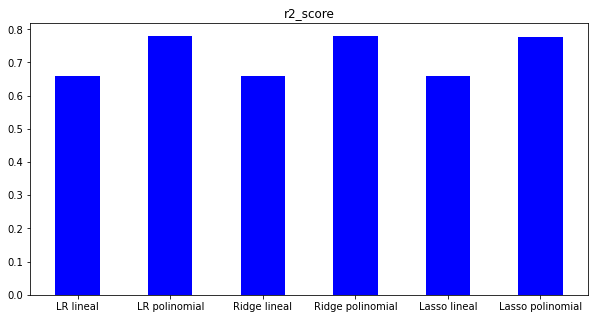

In [ ]:
r2_value = list()
for modelo in modelos:
  r2_value.append(resultados[modelo][2])
  print('r2_sccore de ',modelo," ",resultados[modelo][2])

plt.figure(figsize = (10, 5))
plt.bar(modelos, r2_value, color ='blue', width = 0.48)
plt.title("r2_score")


###2.6.Explica tus resultados, que método se aproxima mejor, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste? ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?
###Agrega las conclusiones

Utilizamos como tamano de prueba(test) y entrenamiento (training) lo hicimos del 10% y 90% respectivammente.

Tenemos que el mejor modelo con el menor MAE es el de Regresion Lineal Polinomial grado 2, y muy ligeramente los otros polinomiales de grado 2 en Lasso y Ridge tambien por un ligero margen de diferencia , que igualmente el RMSE tambien son los mas bajos, y su  r2 estuvo un poco mayor en cada caso con respecto a los lineales, lo cual nos indica una mejor relacion con la data modelada. Entre mas cerca de 1 es r2 esto es mejor.

En cuanto a r2 vemos que los lineales tienen los valores mas bajos, pero sus errores mas altos. Lo cual nos indica que no son tan buenos como los polinomiales.

Recomendamos a la empresa el mas simple: regresion lineal polinomial grado 2 , como un modelo mas simple y con menor grado de error.

Nota: cuando se aumentaba el grado del polinomonio vimos que los errores crecian, por ello nos quedamos con un polinomia grado 2.
